# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghilangkan warning
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/DigiFes/Homework Digifes by Rakamin - DS #32/loan_customer.csv')
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,1976-03-25,6.285650e+11,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,NaN,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,NaN,studio,APPROVE
618,LP002983,1982-03-08,6.281158e+11,Male,Yes,1,Graduate,No,8072.0,240.0,253000,360,30,1.0,NaN,house,APPROVE
619,LP002984,1986-12-05,6.281196e+11,Male,Yes,2,Graduate,No,7583.0,0.0,187000,360,30,1.0,NaN,house,APPROVE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

Data terdiri dari 621 baris dan 17 kolom dengan beberapa kolom memiliki null / missing values (ditandai dengan Non-Null Count <- jumlah baris)

<h1> Section 1 - Data Preprocessing </h1>

# Data Cleansing

## Handling missing values

Mengecek ada tidaknya null / missing values

In [ ]:
df.isnull().values.any()

True

Menghitung banyaknya null / missing values dari setiap kolom

In [ ]:
df.isnull().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

Terdapat kolom dengan null / missing values sangat banyak (lebih dari 50%), sehingga kolom tersebut dihapus

Sebelum menghapus null / missing values, dilihat terlebih dahulu dimensi datanya

In [ ]:
df.shape

(621, 17)

In [ ]:
df.drop('has_credit_card', axis=1, inplace=True)

Selanjutnya dihapus null / missing values dari setiap kolom

In [ ]:
df.dropna(inplace=True)

Menghitung kembali banyaknya null / missing values dari setiap kolom

In [ ]:
df.isnull().sum()

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
property_type         0
loan_status           0
dtype: int64

Sudah tidak ada null / missing values dari setiap kolom, selanjutnya dicek kembali dimensi datanya

In [ ]:
df.shape

(434, 16)

## Handling duplicated data

Mengecek ada tidaknya data yang duplikat

In [ ]:
df.duplicated().any()

True

Menghitung banyaknya data yang duplikat

In [ ]:
df.duplicated().sum()

5

Tidak terdapat data yang duplikat

## Handling Outlier

mengidentifikasi kolom dengan data numerik

In [ ]:
numerik = ['applicant_income', 'coapplicant_income', 'loan_amount']

Mengecek outlier di setiap kolom dengan data numerik menggunakan boxplot

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]

<AxesSubplot:xlabel='applicant_income'>

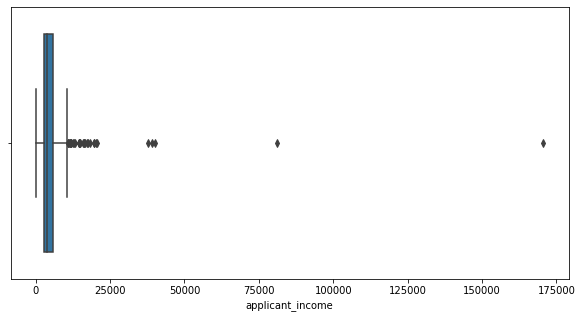

In [ ]:
sns.boxplot(x = df['applicant_income'], data=df)

<AxesSubplot:xlabel='coapplicant_income'>

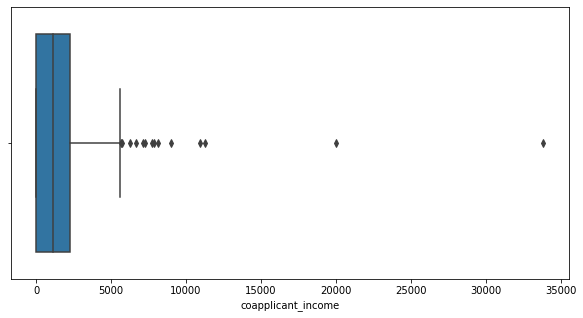

In [ ]:
sns.boxplot(x = df['coapplicant_income'], data=df)

<AxesSubplot:xlabel='loan_amount'>

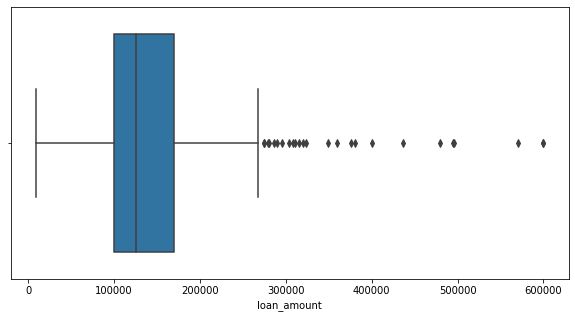

In [ ]:
sns.boxplot(x = df['loan_amount'], data=df)

Semua kolom terdapat outlier, selanjutnya outlier akan dihapus

In [ ]:
import numpy as np

# Using IQR
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in numerik :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 434
Jumlah baris setelah memfilter outlier: 380


Cek kembali dimensi datanya

In [ ]:
df.shape

(380, 16)

Untuk kolom dengan data kategorik, juga dapat dilakukan penghapusan outlier dengan cara mengindentifikasi secara manual data yang tidak masuk akal atau tidak cocok dengan data lainnya. Untuk kasus ini, tidak ada data kategorik yang tidak masuk akal.


## Feature Encoding

Mengidentifikasi kolom dengan data kategorik

In [ ]:
kategorik = ['gender', 'married', 'dependents', 'education', 'self_employed', 'credit_history', 'property_type', 'loan_status']

Melihat kategori dari setiap kolom dengan data kategorik

In [ ]:
for i in kategorik :
  print(f'Kolom {i} = {df[i].unique()}')

Kolom gender = ['Male' 'Female']
Kolom married = ['No' 'Yes']
Kolom dependents = ['0' '1' '2' '3+']
Kolom education = ['Graduate' 'Not Graduate']
Kolom self_employed = ['No' 'Yes']
Kolom credit_history = [1. 0.]
Kolom property_type = ['house' 'studio' 'apartment']
Kolom loan_status = ['APPROVE' 'REJECT']


<AxesSubplot:xlabel='loan_status', ylabel='count'>

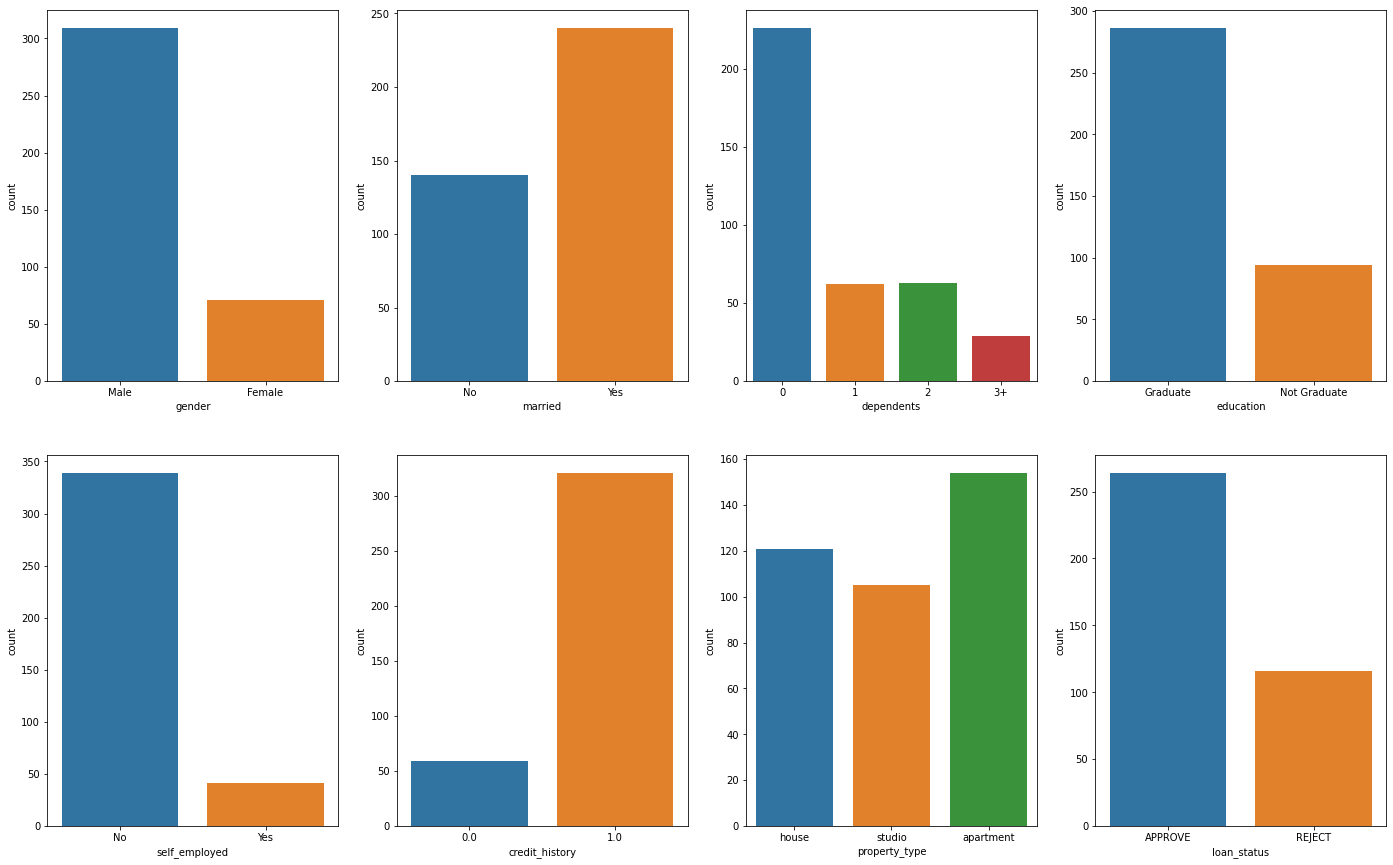

In [ ]:
plt.rcParams['figure.figsize'] = [24, 15]
fig, axs = plt.subplots(2, 4)

sns.countplot(x = df['gender'], ax = axs[0,0])
sns.countplot(x = df['married'], ax = axs[0,1])
sns.countplot(x = df['dependents'], ax = axs[0,2])
sns.countplot(x = df['education'], ax = axs[0,3])
sns.countplot(x = df['self_employed'], ax = axs[1,0])
sns.countplot(x = df['credit_history'], ax = axs[1,1])
sns.countplot(x = df['property_type'], ax = axs[1,2])
sns.countplot(x = df['loan_status'], ax = axs[1,3])

Melakukan label encoding untuk setiap kategori

In [ ]:
df_enc = df.copy()

In [ ]:
mapping_gender = {
    'Male' : 1,
    'Female' : 0,
}

mapping_married = {
    'Yes' : 1,
    'No' : 0,
}

mapping_dependents = {
    '0' : 0,
    '1' : 1,
    '2' : 2,
    '3+' : 3
}

mapping_education = {
    'Graduate' : 1,
    'Not Graduate' : 0
}

mapping_self_employed = {
    'No' : 0,
    'Yes' : 1
}

# Untuk credit_history
# sudah numerik

mapping_property_type = {
    'apartment' : 0,
    'house' : 1,
    'studio' : 2
}

mapping_loan_status = {
    'APPROVE' : 1,
    'REJECT' : 0
}

df_enc['gender'] = df_enc['gender'].map(mapping_gender)
df_enc['married'] = df_enc['married'].map(mapping_married)
df_enc['dependents'] = df_enc['dependents'].map(mapping_dependents)
df_enc['education'] = df_enc['education'].map(mapping_education)
df_enc['self_employed'] = df_enc['self_employed'].map(mapping_self_employed)
df_enc['property_type'] = df_enc['property_type'].map(mapping_property_type)
df_enc['loan_status'] = df_enc['loan_status'].map(mapping_loan_status)

Cek kembali kategori dari setiap kolom dengan data kategorik

In [ ]:
for i in kategorik :
  print(f'Kolom {i} = {df_enc[i].unique()}')

Kolom gender = [1 0]
Kolom married = [0 1]
Kolom dependents = [0 1 2 3]
Kolom education = [1 0]
Kolom self_employed = [0 1]
Kolom credit_history = [1. 0.]
Kolom property_type = [1 2 0]
Kolom loan_status = [1 0]


# Business Insight

<h1> Section 2 - Analisis minat pelanggan berdasarkan pada tipe properti </h1>

## Analisis minat pelanggan berdasarkan pada tipe properti

In [ ]:
df2 = df.groupby(['gender', 'property_type'])['loan_id'].count().reset_index()
df2.rename(columns={'gender':'Gender'}, inplace=True)
df2.rename(columns={'property_type':'Property Type'}, inplace=True)
df2.rename(columns={'loan_id':'Count'}, inplace=True)
df2

,Gender,Property Type,Count
0,Female,apartment,34
1,Female,house,19
2,Female,studio,18
3,Male,apartment,120
4,Male,house,102
5,Male,studio,87


Text(0.5, 1.0, 'Comparison of Customer Interest Based on Property Type')

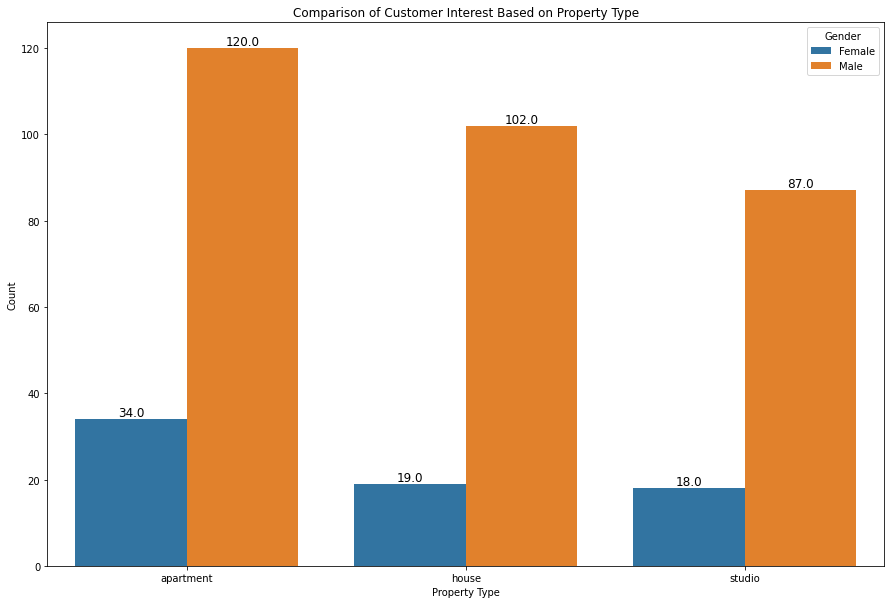

In [ ]:
f, ax = plt.subplots(1,1,figsize=(15,10))
sns.barplot(x='Property Type', y='Count', hue='Gender', data=df2)

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    ax.text(text_x, text_y, text, ha='center', va='bottom', size=12)

ax.set_xlabel('Property Type')
ax.set_ylabel('Count')
ax.set_title('Comparison of Customer Interest Based on Property Type')

Pada Visualisasi di atas terlihat bahwa setiap jenis properti lebih banyak diminati oleh laki-laki dan jenis properti dengan peminat terbanyak adalah apartment

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam 

In [ ]:
df3 = df.groupby(['married', 'loan_term_year'])['loan_id'].count().reset_index()
df3.rename(columns={'married':'Married'}, inplace=True)
df3.rename(columns={'loan_term_year':'Loan Term Year'}, inplace=True)
df3.rename(columns={'loan_id':'Count'}, inplace=True)
df3

,Married,Loan Term Year,Count
0,No,3,2
1,No,10,1
2,No,15,4
3,No,25,3
4,No,30,124
5,No,40,6
6,Yes,5,1
7,Yes,7,3
8,Yes,10,1
9,Yes,15,21


Text(0.5, 1.0, 'Comparison of Married Status Based on Loan Term Year')

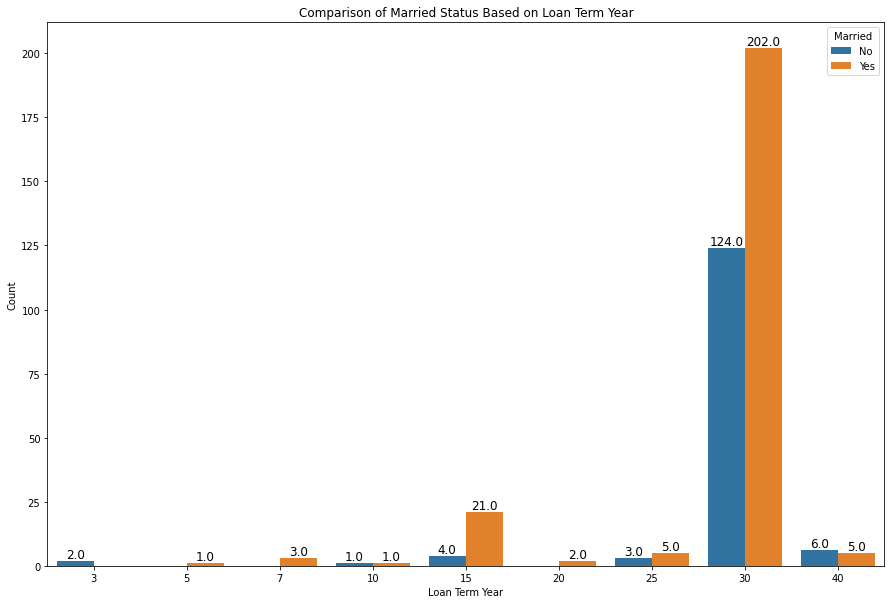

In [ ]:
f, ax = plt.subplots(1,1,figsize=(15,10))
sns.barplot(x='Loan Term Year', y='Count', hue='Married', data=df3)

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    ax.text(text_x, text_y, text, ha='center', va='bottom', size=12)

ax.set_xlabel('Loan Term Year')
ax.set_ylabel('Count')
ax.set_title('Comparison of Married Status Based on Loan Term Year')

Pada Visualisasi di atas terlihat bahwa status perkawinan berpengaruh terhadap jangka waktu peminjaman